In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from time import sleep

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [2]:
def generaPath(tipo, nombre):
    prepath = str(os.getcwd())
    if (tipo == "I"):
        path = prepath + '\\origen\\' + nombre
    else :
        path = prepath + '\\generados\\' + nombre
    return path

In [3]:
df_tr_fu_filt = pd.read_csv(generaPath('O', 'df_tr_fu_filt_delta.csv'))
#df_re_fu_filt.columns = ['idSorteo','n1','n2','n3','n4', 'n5','sb','delta']
print(df_tr_fu_filt)

     idSorteo  n1  n2  n3  n4  n5  sb  delta
0        2051   7  14  18  27  28   4  GDIAU
1        2050   1  14  36  37  40   8  MUACD
2        2049   8  28  33  41  43   4  SEHBH
3        2048   6  29  37  39  43  13  VHBDF
4        2047  16  21  24  26  33   8  ECBGY
..        ...  ..  ..  ..  ..  ..  ..    ...
376      1675   1  20  36  39  43  10  ROCDA
377      1674   5   6   7  12  37   6  AAEXK
378      1673   6  19  25  28  36   1  MFCHM
379      1672   1   2  25  31  33  14  AVFBK
380      1671  15  28  36  37  41  10  MHADP

[381 rows x 8 columns]


In [4]:
df_re_fu_filt = pd.read_csv(generaPath('O', 'df_re_fu_filt_delta.csv'))
#df_re_fu_filt.columns = ['idSorteo','n1','n2','n3','n4', 'n5','sb','delta']
print(df_re_fu_filt)

     idSorteo  n1  n2  n3  n4  n5  sb  delta
0        2051   2  11  13  22  38   5  IBIOG
1        2050   1   9  11  23  41   1  HBLQC
2        2049   7  10  17  37  43   7  CGSFG
3        2048   3   6   9  31  32  11  CCUAN
4        2047   6  11  13  40  43   5  EBZCF
..        ...  ..  ..  ..  ..  ..  ..    ...
376      1675   3   5   8  20  24  14  BCLDU
377      1674   5  12  15  20  42  14  GCEUF
378      1673   8  21  22  37  38   4  MAÑAM
379      1672   9  12  16  28  38   1  CDLJN
380      1671   3   9  10  21  40  10  FAKRF

[381 rows x 8 columns]


In [5]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

In [6]:
def htmlcolor(r, g, b):
    def _chkarg(a):
        if isinstance(a, int): # clamp to range 0--255
            if a < 0:
                a = 0
            elif a > 255:
                a = 255
        elif isinstance(a, float): # clamp to range 0.0--1.0 and convert to integer 0--255
            if a < 0.0:
                a = 0
            elif a > 1.0:
                a = 255
            else:
                a = int(round(a*255))
        else:
            raise ValueError('Arguments must be integers or floats.')
        return a
    r = _chkarg(r)
    g = _chkarg(g)
    b = _chkarg(b)
    return '#{:02x}{:02x}{:02x}'.format(r,g,b)

In [7]:
def add_to_radar(idSorteo, ax, df, angles, color ):
    values = df.iloc[idSorteo].tolist()
    values2 = values
    #print(values)
    ideSorteo = values[0:1]
    values = values[1:7]
    ax.plot(angles, values, color=color, linewidth=1, label=str(values2))
    ax.fill(angles, values, color=color, alpha=0.25)  

In [8]:
def radar_drawer(df):
    labels = ['num1', 'num2', 'num3', 'num4', 'num5', 'sb']                                 # Each attribute we'll plot in the radar chart.
    num_vars = len(labels)                                                                  # Number of variables we're plotting.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()                   # Split the circle into even parts and save the angles so we know where to put each axis.

    # The plot is a circle, so we need to "complete the loop" and append the start value to the end. Angles += angles[:1]
    plt.rcParams.update({'figure.max_open_warning': 0})
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))                     # ax = plt.subplot(polar=True)

    sorteos = df.shape
    for x in range(sorteos[0]):                                                             # Add each car to the chart.
        randomColor = (random.randint(0,255), random.randint(0,255), random.randint(0,255))    
        color = "%06x" % random.randint(0, 0xFFFFFF)

        add_to_radar(x, ax, df, angles, htmlcolor(random.randint(0,255), random.randint(0,255), random.randint(0,255)))

    angulito = np.pi / 2                                                                    # Fix axis to go in the right order and start at 12 o'clock. print(angulito)
    ax.set_theta_offset(angulito)
    ax.set_theta_direction(-1)

    ax.set_thetagrids(np.degrees(angles), labels)                                           # Draw axis lines for each angle and label.
    for label, angle in zip(ax.get_xticklabels(), angles):                                  # Go through labels and adjust alignment based on where it is in the circle.
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')

    ax.set_ylim(0, 45)                                                                      # Ensure radar goes from 0 to 100.
    # You can also set gridlines manually ax.set_rgrids([20, 40, 60, 80, 100]) Set position of y-labels (0-100) to be in the middle of the first two axes.
    ax.set_rlabel_position(180 / num_vars)
    ax.tick_params(colors='#222222')                                                        # Add some custom styling. Change the color of the tick labels.
    ax.tick_params(axis='y', labelsize=10)                                                  # Make the y-axis (0-100) labels smaller.
    ax.grid(color='#AAAAAA')                                                                # Change the color of the circular gridlines.
    ax.spines['polar'].set_color('#222222')                                                 # Change the color of the outermost gridline (the spine).
    ax.set_facecolor('#FAFAFA')                                                             # Change the background color inside the circle itself.
    ax.set_title('Comparar sorteos con inicios similares across dimensions', y=1.08)        # Add title
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))                                 # Add a legend as well.


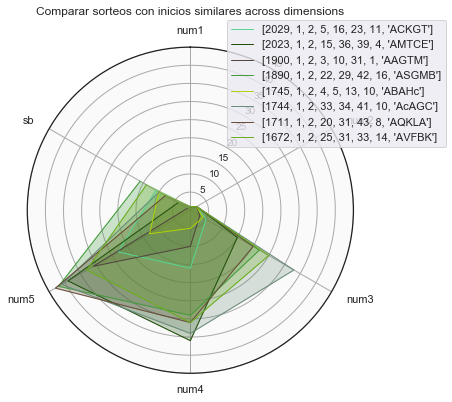

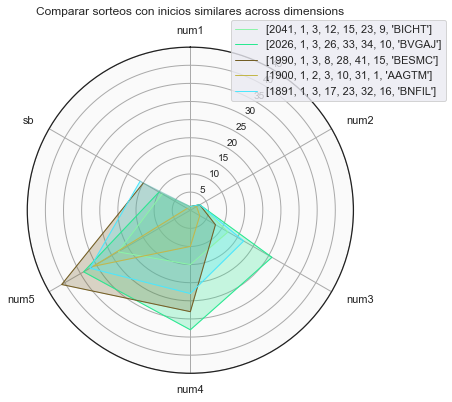

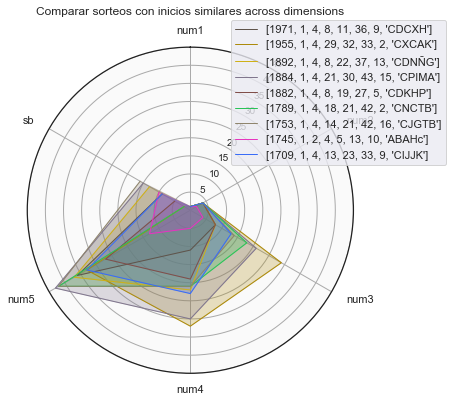

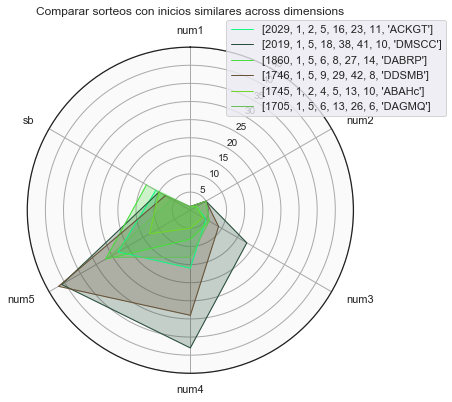

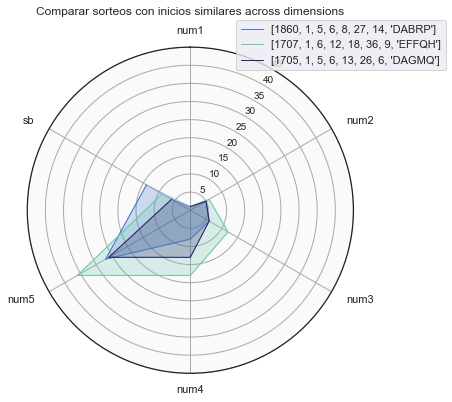

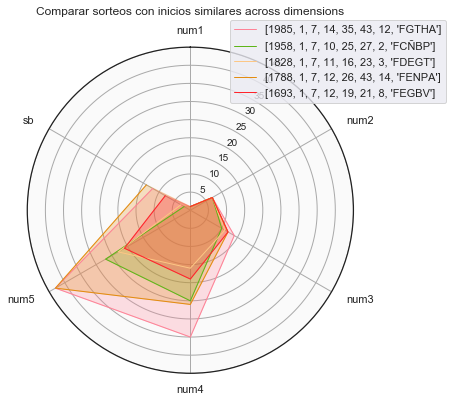

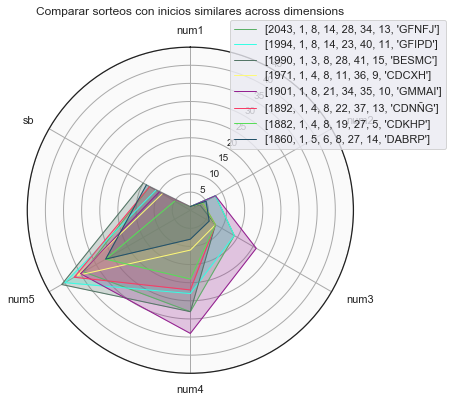

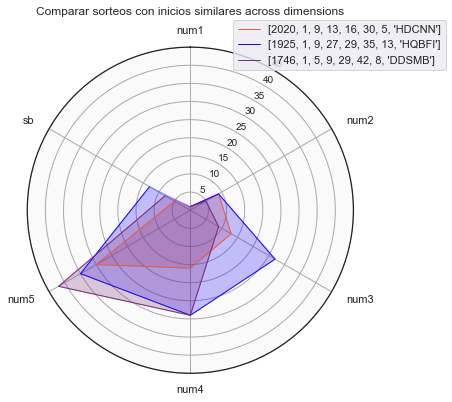

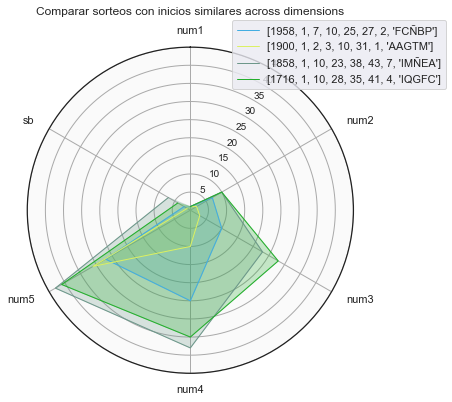

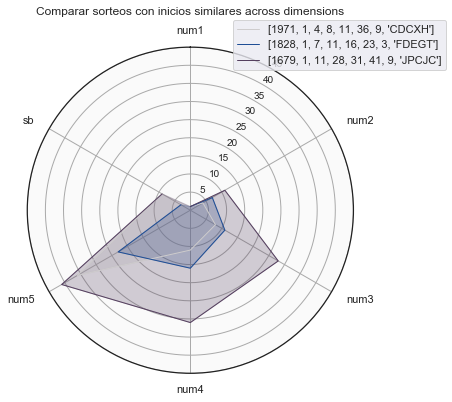

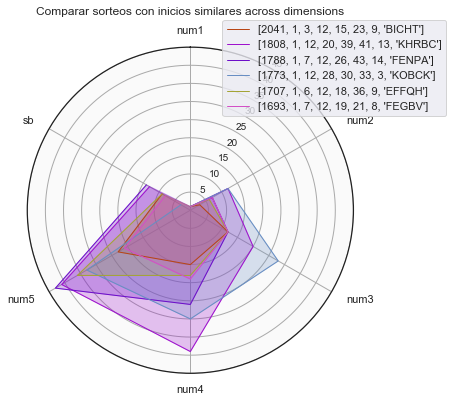

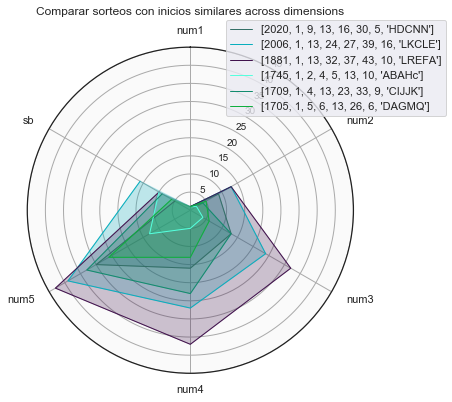

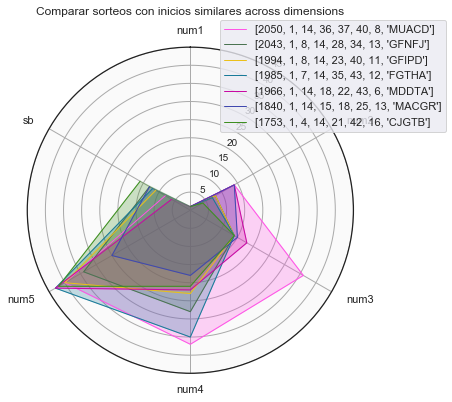

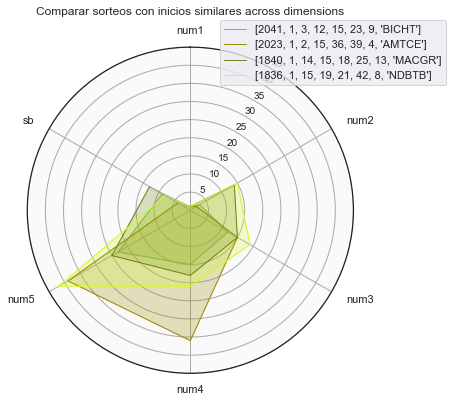

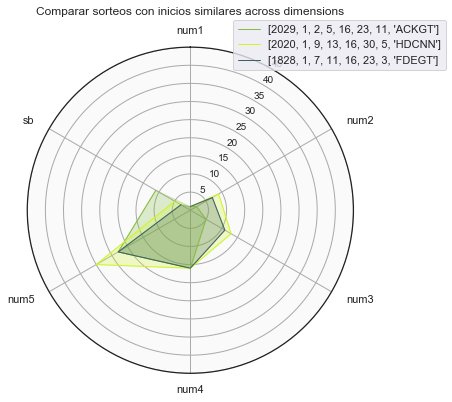

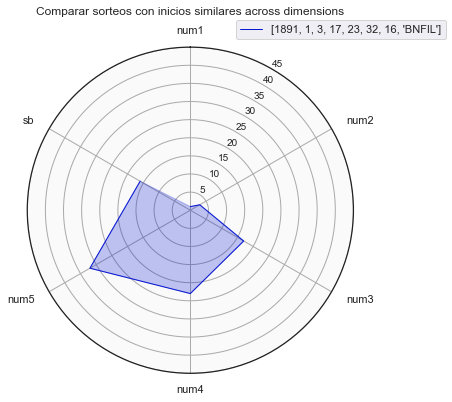

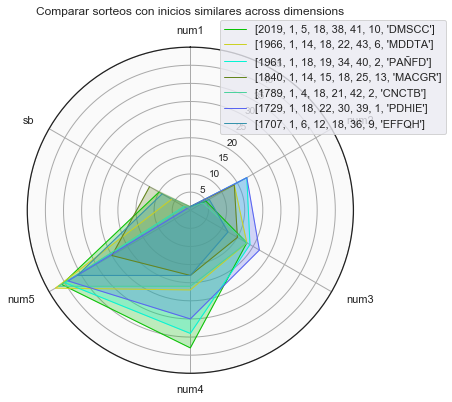

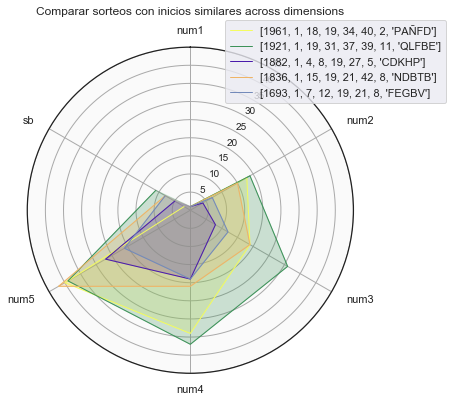

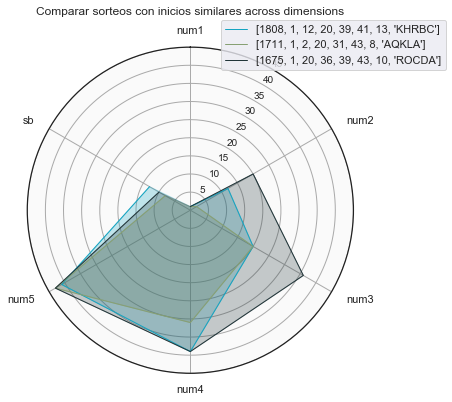

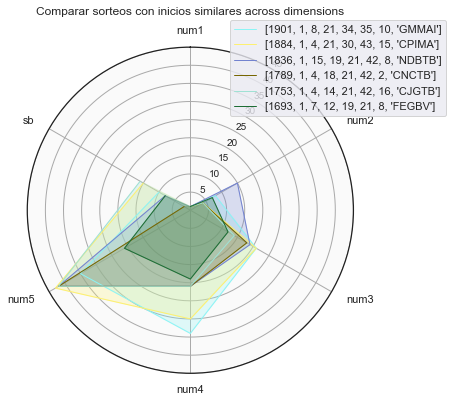

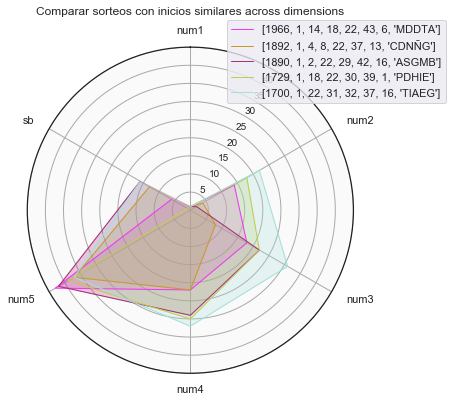

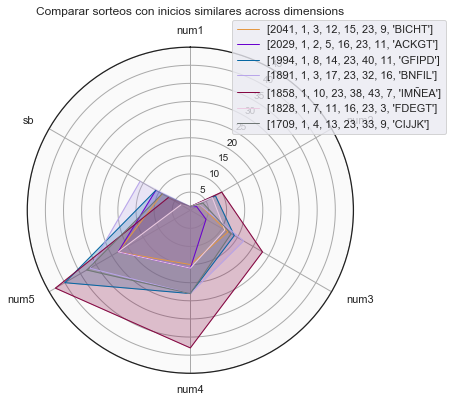

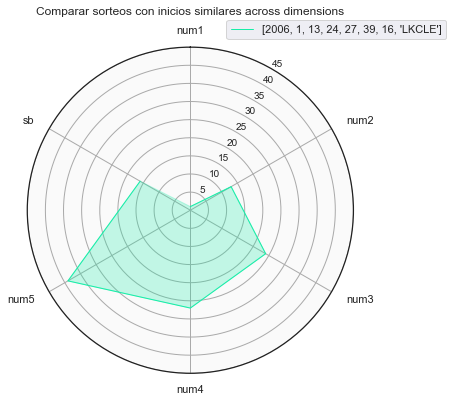

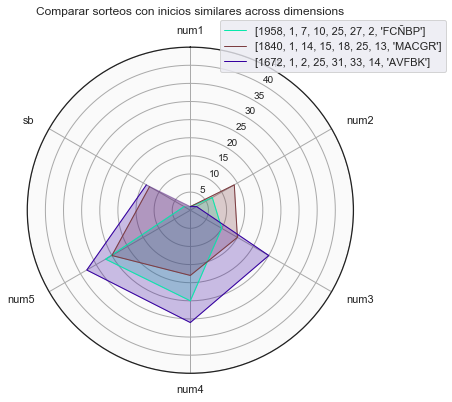

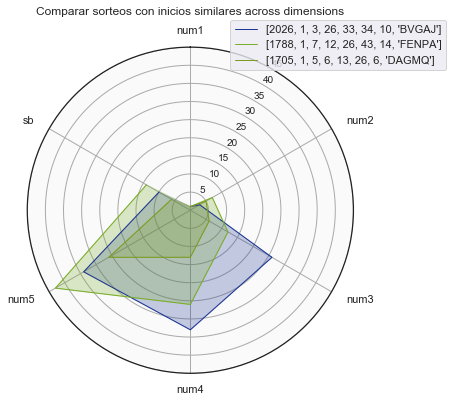

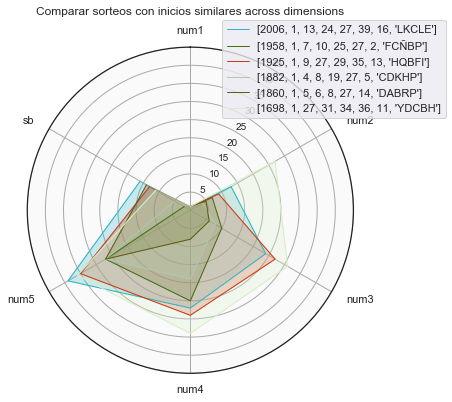

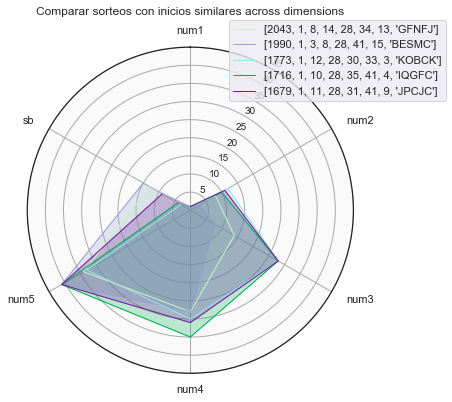

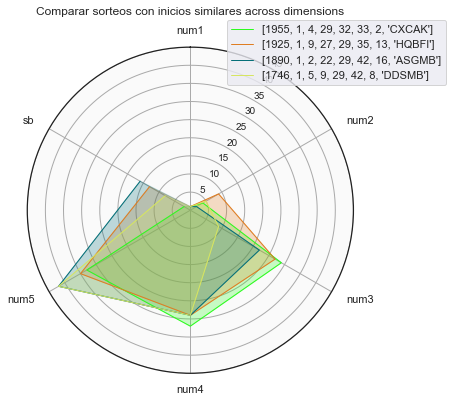

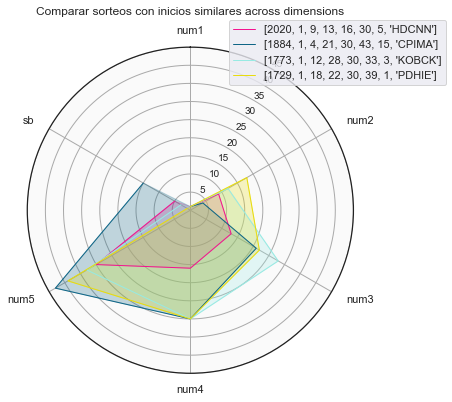

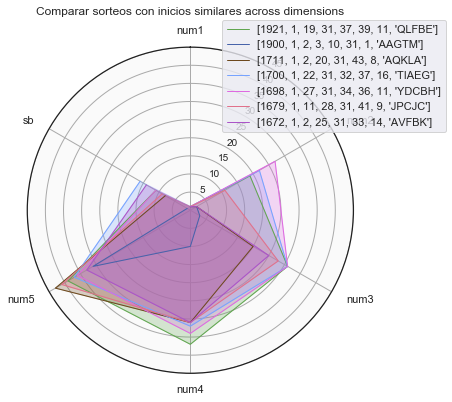

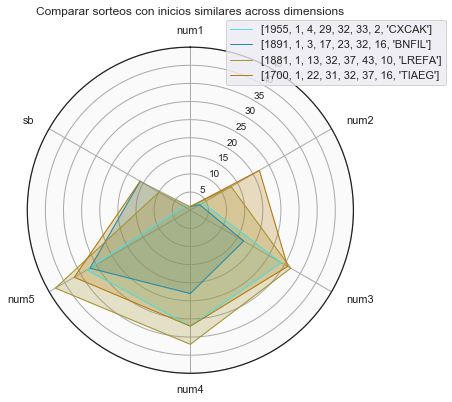

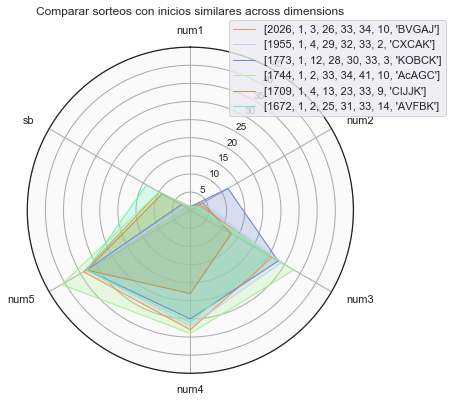

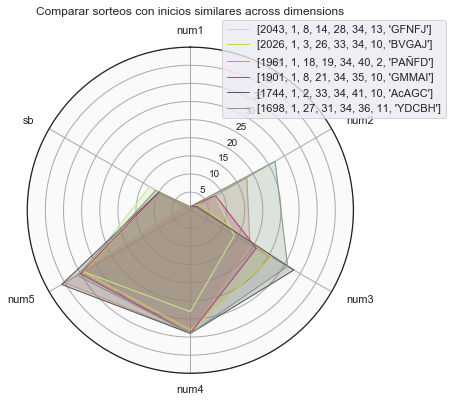

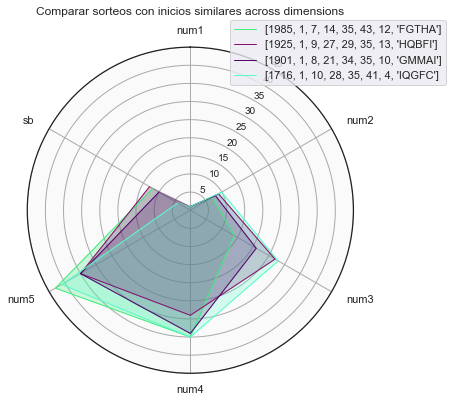

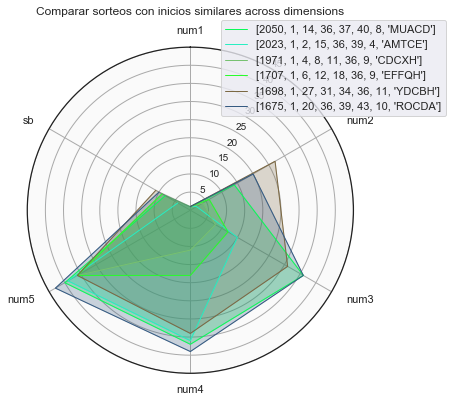

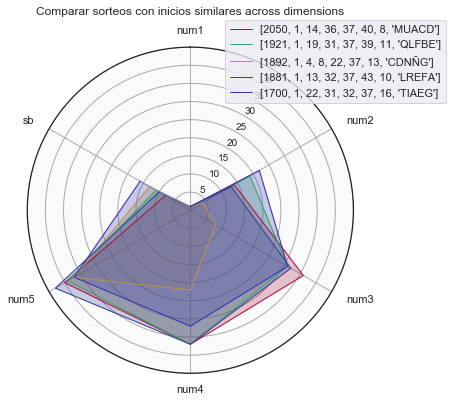

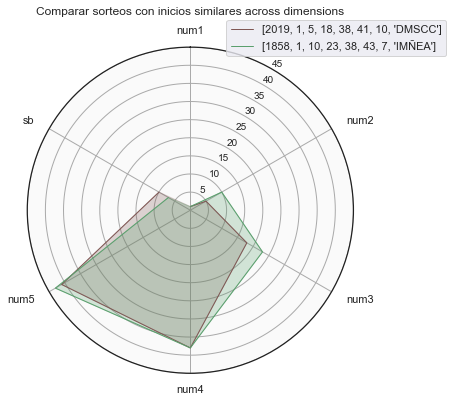

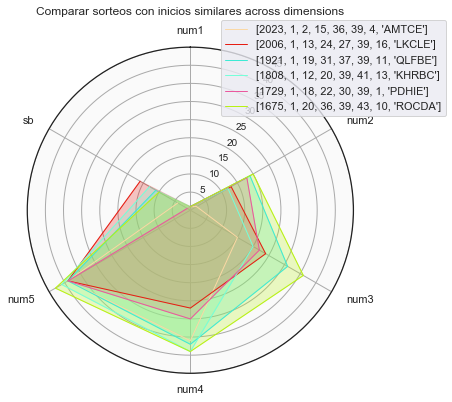

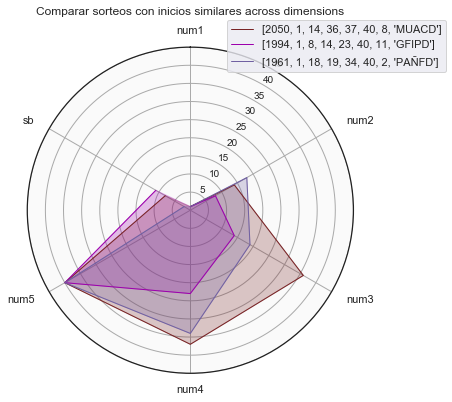

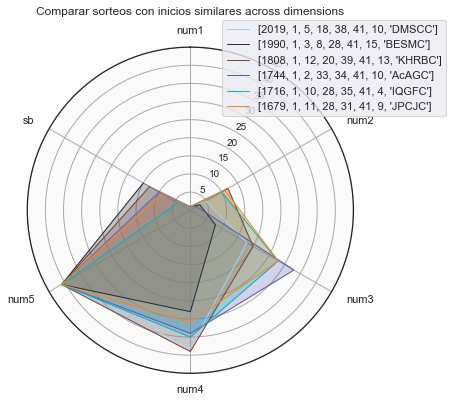

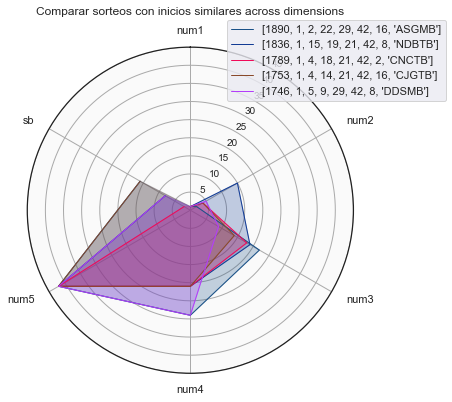

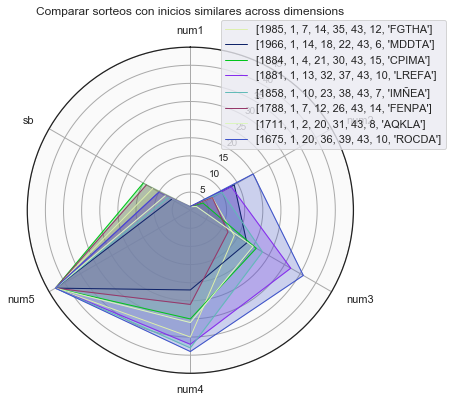

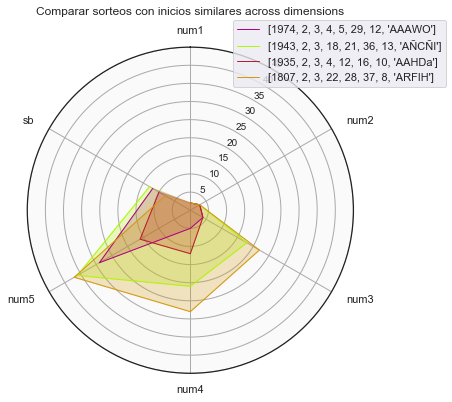

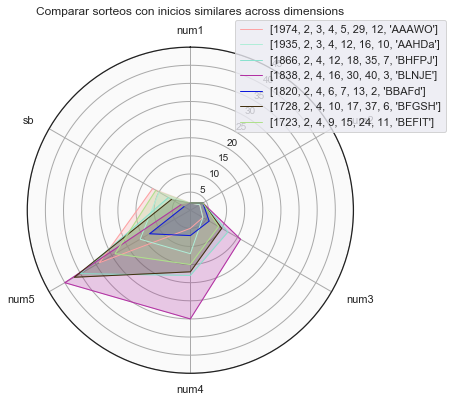

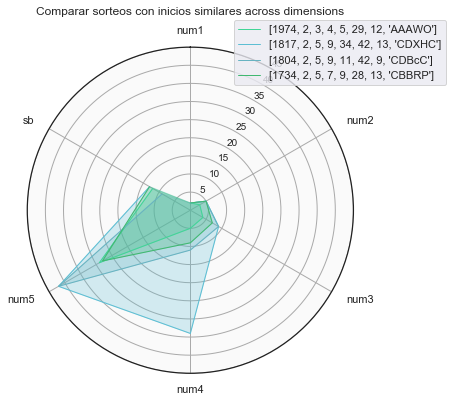

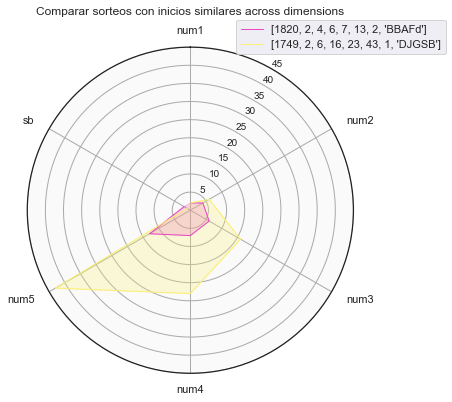

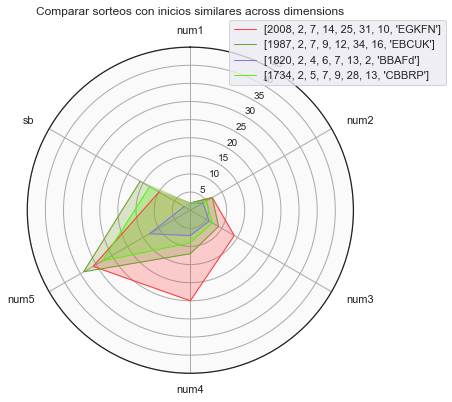

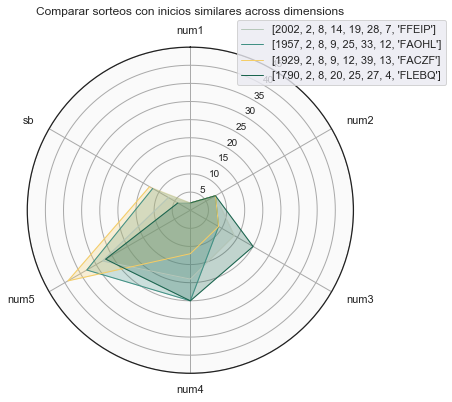

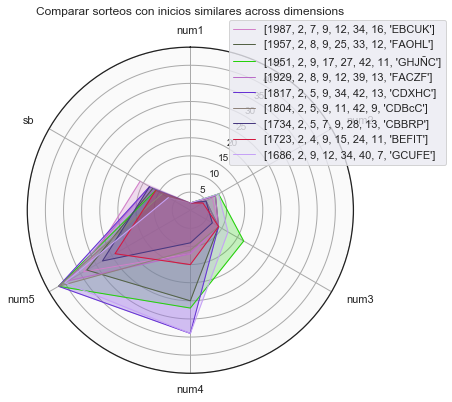

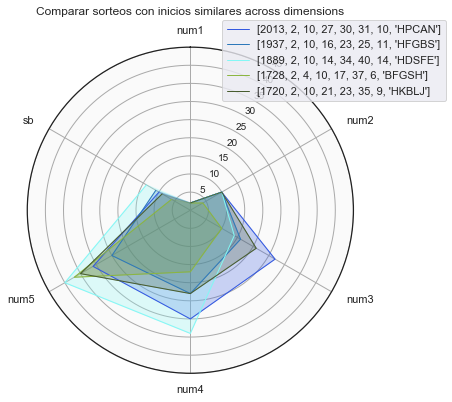

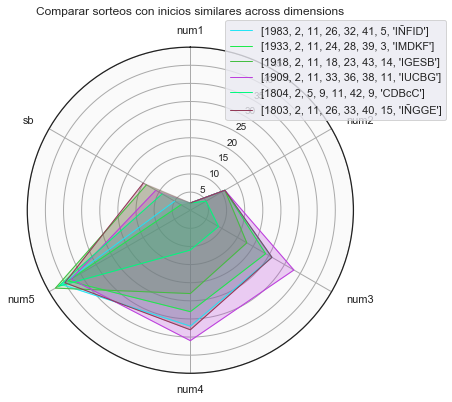

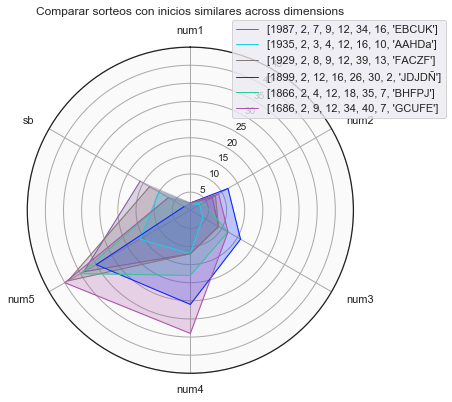

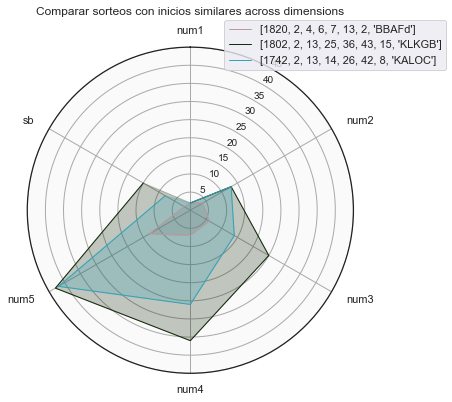

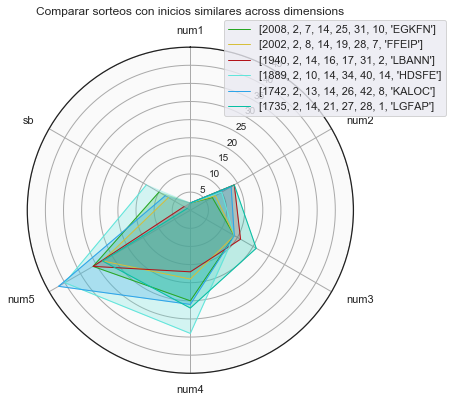

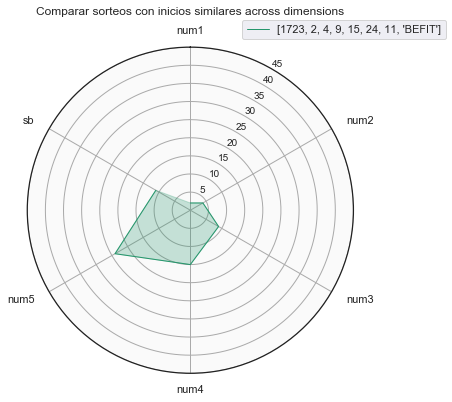

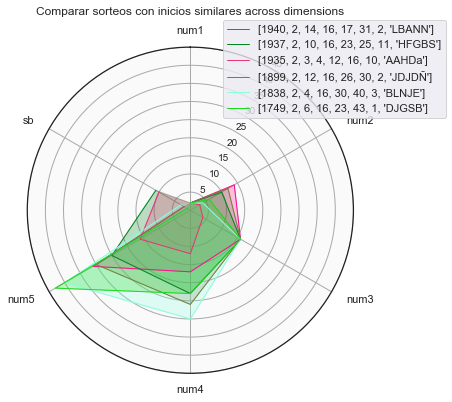

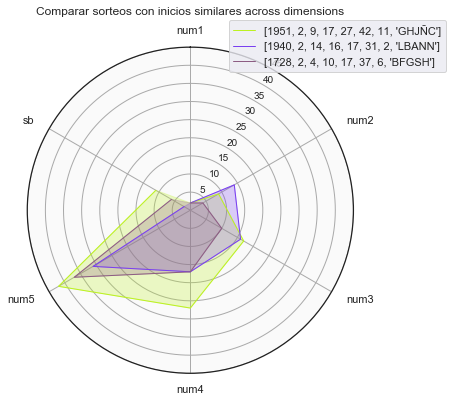

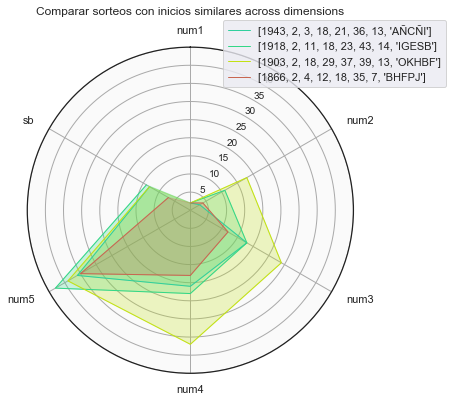

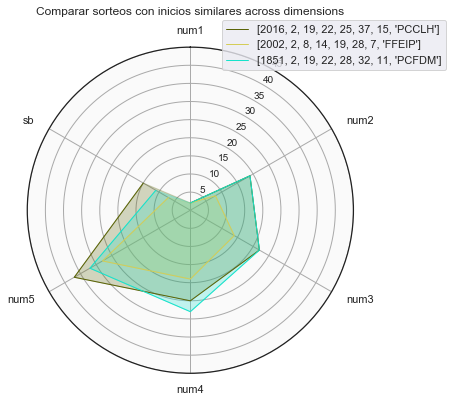

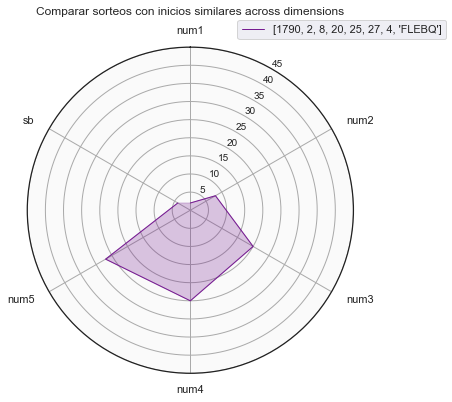

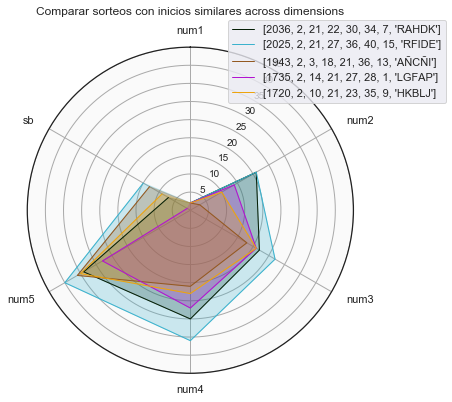

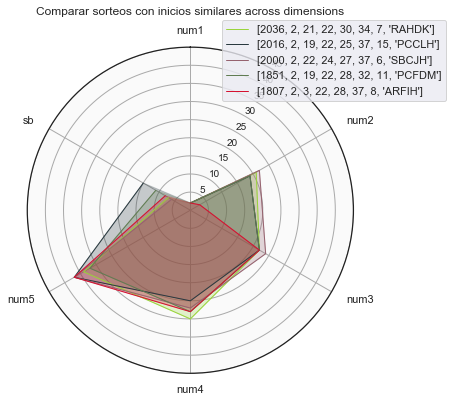

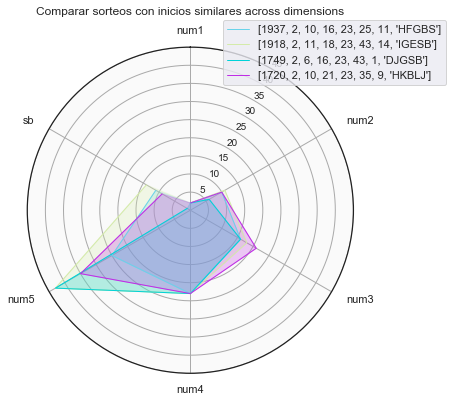

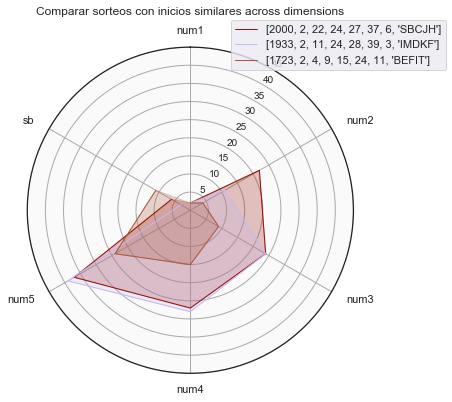

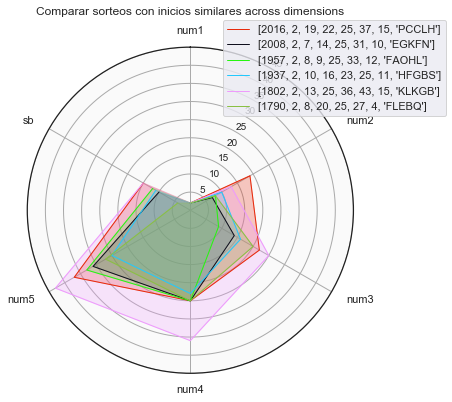

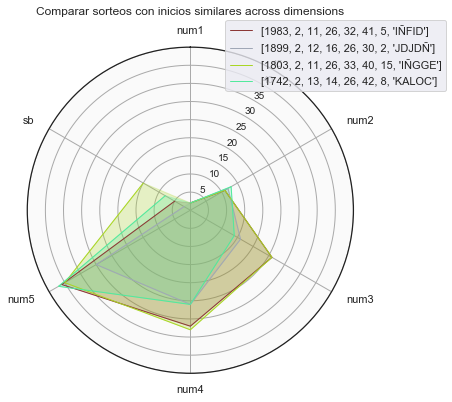

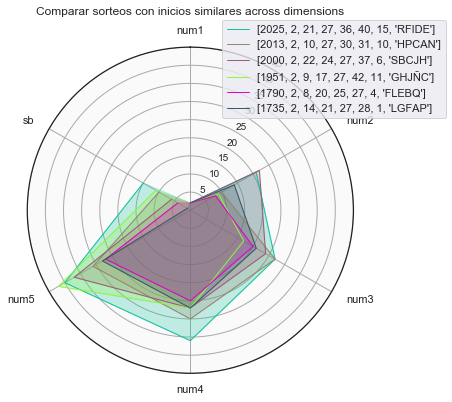

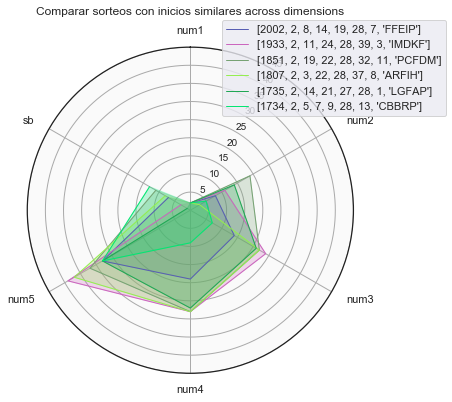

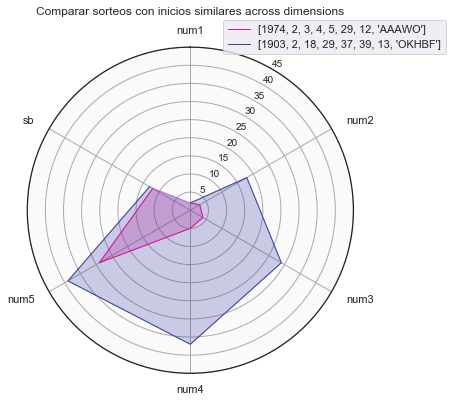

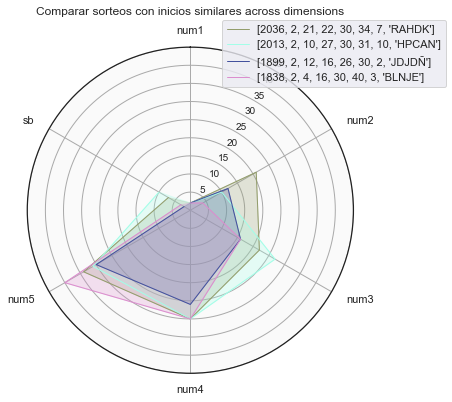

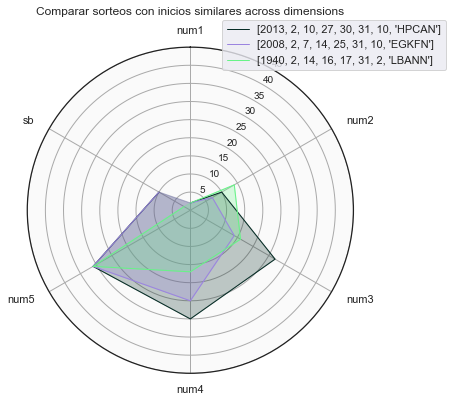

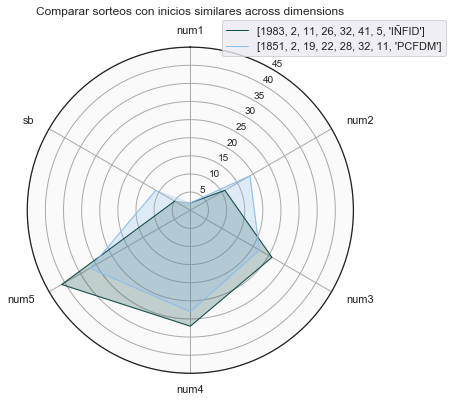

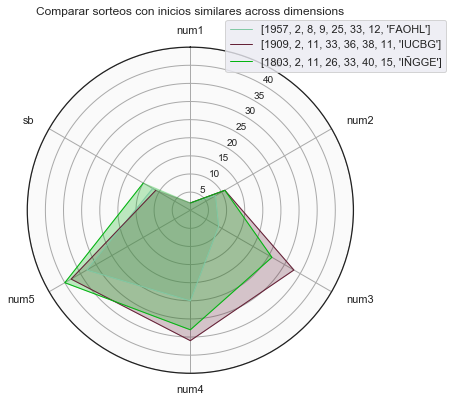

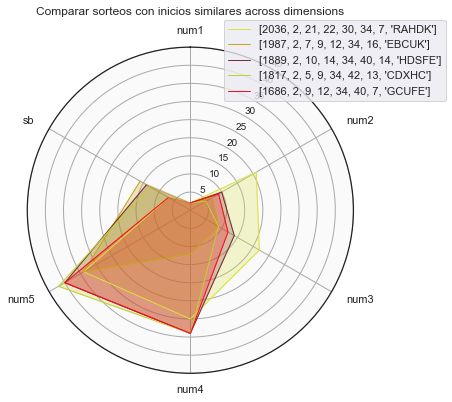

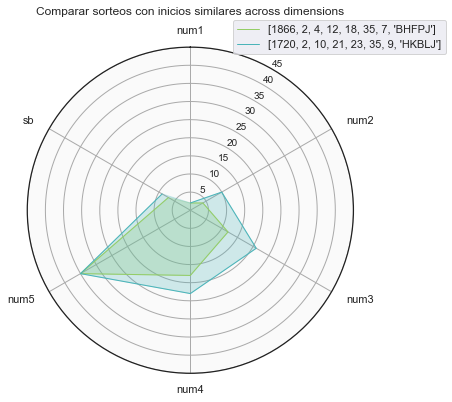

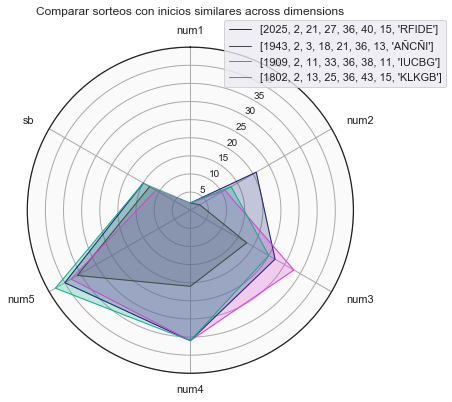

In [ ]:
for x in range (1, 42):
    for xx in range(2, 45):
        df_tr_fu_filt_p = df_tr_fu_filt[(df_tr_fu_filt['n1']==x)]
        df_tr_fu_filt_1 = df_tr_fu_filt_p[ (df_tr_fu_filt_p['n2']==xx) |  (df_tr_fu_filt_p['n3']==xx) | (df_tr_fu_filt_p['n4']==xx) | (df_tr_fu_filt_p['n5']==xx)]
        if df_tr_fu_filt_1['n1'].count() > 0:
            radar_drawer(df_tr_fu_filt_1) 
            #print(x, xx, sep = ',' )
            #sleep(1)